> Data cleaning and preprocessing. 
* Handling missing values, converting categorical variables into numeric variables, scaling/normalizing the data, and handling any outliers or anomalies in the data. In addition, I'll want to address the class imbalance issue by either oversampling the minority class (loans that are not fully paid) or undersampling the majority class (loans that are fully paid).
> Exploratory data analysis (EDA). 
* Exploring the dataset to gain insights into the data, such as distributions of variables, correlations between variables, and identifying any patterns in the data.
> Feature engineering. 
* Creating new features or transforming existing features to improve the predictive power of the model. 
> Model selection. 
* Try several models, such as decision trees, random forests, logistic regression, or support vector machines (SVM). 
Model training and evaluation. Training the selected model on the data and evaluating its performance using various metrics such as accuracy, precision, recall, and F1 score. 
> Hyperparameter tuning. 
* Fine-tuning the hyperparameters of the selected model to improve its performance. 
> Creating the web app using Gradio. 
* Once you have selected the best model, you can create a web app using Gradio. 
> Deploying the web app on Spaces. 
* Once you have created the web app using Gradio, to deploy it on Spaces. 
> Testing the web app. 
* Test to make sure it is working as expected.

## I) EXPLANATORY DATA ANALYSIS

In [17]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
loan_df = pd.read_csv("loan_data.csv")
loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


|NO|VARIABLE|EXPLANATION|
|---| --- |--- |
| 0 | Credit_policy | 1 if client meets underwriting criteria, 0 otherwise |
| 1 | Purpose | Purpose of the loan |
| 2 | Int_rate | Int rate of the loan {high rate for more risky borrower} |
| 3 | Installments | Monthly installments owed by borrower if loan is funded |
| 4 | log_annual_inc | Natural log of self reported annual income of the borrower |
| 5 | dti | debt-to-income ratio of borrower {debt / annual income} |
| 6 | fico | FICO credit score of borrower|
| 7 | days_with_cr_line | nb of days borrower has had a credit line |
| 8 | revol_bal | borrower's revolving balance {unpaid amt at end of credit card billing style} |
| 9 | revol_util | borrower's revolving line utilization rate {Credit line amt used relative to ttl credit available} |
| 10 | inq_last_6mnths | borrower's nb of inquiries by creditors in last 6 mnths |
| 11 | delinq_2yrs | nb of times borrower had been 30+ days past due on payment in the past 2 years |
| 12 | pub_rec | Borrower's nb of derogatory public records |
| 13 | not_fully_paid | 1 if loan is not fully paid, 0 otherwise | 

In [19]:
# Display shape of date
print(f"Number of rows and columns {loan_df.shape}")

# Display summary statistics of df
print(loan_df.describe())

Number of rows and columns (9578, 14)
       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.37561

In [20]:
# Display missing values in each column
print(loan_df.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


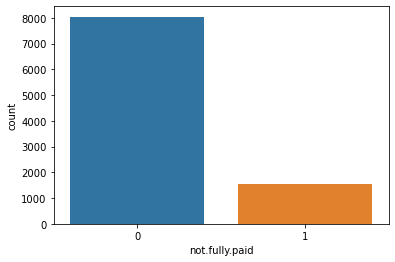

In [21]:
# Visualize the Target variable
sns.countplot(x= "not.fully.paid", data=loan_df)
plt.show()

In [22]:
loan_df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

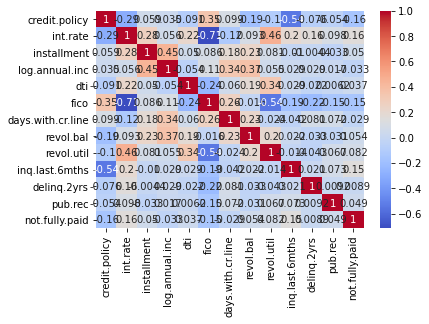

In [23]:
# Visualize the correlation btn variables
corr = loan_df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True , cmap= "coolwarm")
plt.show()

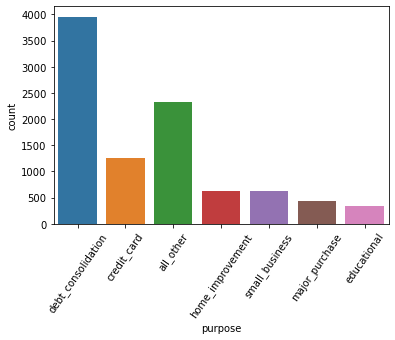

In [24]:
# Understand Loan Purpose distribution
sns.countplot(x = "purpose", data = loan_df )
plt.xticks(rotation=55)
plt.show()

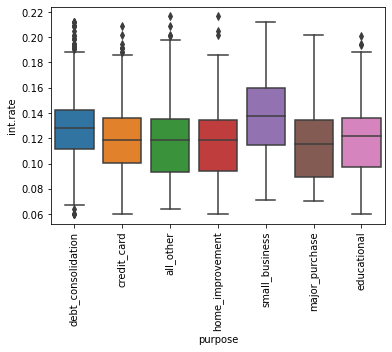

In [25]:
# Understanding distribution of interest rates by loan purpose
sns.boxplot(x= "purpose", y= "int.rate", data=loan_df)
plt.xticks(rotation=90)
plt.show()

## II) FEATURE ENGINEERING

> Create 2 new features:
 * Installment to income ratio
 * credit history

In [26]:
loan_df["installment_to_income_ratio"] = (loan_df["installment"] / loan_df["log.annual.inc"])
loan_df["credit_history"] = (loan_df["delinq.2yrs"] + loan_df["pub.rec"]) / loan_df["fico"]

In [27]:
# Drop unnecessary columns 
loan_df = loan_df.drop(columns=["credit.policy","days.with.cr.line","purpose"])
loan_df.head()  

,int.rate,installment,log.annual.inc,dti,fico,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,installment_to_income_ratio,credit_history
0,0.1189,829.10,11.350407,19.48,737,28854,52.1,0,0,0,0,73.045842,0.000000
1,0.1071,228.22,11.082143,14.29,707,33623,76.7,0,0,0,0,20.593491,0.000000
2,0.1357,366.86,10.373491,11.63,682,3511,25.6,1,0,0,0,35.365143,0.000000
3,0.1008,162.34,11.350407,8.10,712,33667,73.2,1,0,0,0,14.302571,0.000000
4,0.1426,102.92,11.299732,14.97,667,4740,39.5,0,1,0,0,9.108180,0.001499


In [28]:
# Convert categorical variables to numerical ones
from sklearn.preprocessing import LabelEncoder, StandardScaler

loan_df["not.fully.paid"] = LabelEncoder().fit_transform(loan_df["not.fully.paid"])

In [29]:
# Scale the numerical features using standard scaler
scaler = StandardScaler()
numerical_cols = ["int.rate", "installment","log.annual.inc","dti","fico","revol.bal","revol.util","inq.last.6mths","delinq.2yrs","pub.rec","installment_to_income_ratio","credit_history"]
loan_df[numerical_cols] = scaler.fit_transform(loan_df[numerical_cols])

In [30]:
loan_df.head()

,int.rate,installment,log.annual.inc,dti,fico,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,installment_to_income_ratio,credit_history
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.353732,0.182704,-0.716989,-0.299730,-0.237003,0,2.465358,-0.366662
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,0.495018,1.030602,-0.716989,-0.299730,-0.237003,0,-0.457185,-0.366662
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,0,0.365863,-0.366662
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,0.496321,0.909966,-0.262470,-0.299730,-0.237003,0,-0.807703,-0.366662
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,0,-1.097124,1.297273


In [31]:
# Handling class imbalance using imblearn's Oversampling method
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X = loan_df.drop("not.fully.paid", axis=1)
y = loan_df["not.fully.paid"]

X_resampled, y_resampled = sm.fit_resample(X,y)

loan_df = pd.concat([X_resampled, y_resampled], axis=1)
loan_df["not.fully.paid"].value_counts()

not.fully.paid
0    8045
1    8045
Name: count, dtype: int64

### III) MODEL SELECTION

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Split dataset into training & testing sets
X = loan_df.drop("not.fully.paid", axis=1)
y = loan_df["not.fully.paid"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [33]:
# Fit and Evaluate Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_score = dt.score(X_test,y_test)
print("Decision Tree Classifier Accuracy: {:.2f}%".format(dt_score*100))

# Fit and Evaluate Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print("Random Forest Classifier Accuracy: {:.2f}%".format(rf_score*100))

# Fit and Evaluate Logistic Regression Classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print("Logistic Regression Classifier Accuracy: {:.2f}%".format(lr_score*100))

# Fit and Evaluate Support Vector Machine Classifier
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
print("Support Vector Machine Classifier Accuracy: {:.2f}%".format(svm_score*100) )

Decision Tree Classifier Accuracy: 81.21%
Random Forest Classifier Accuracy: 89.14%
Logistic Regression Classifier Accuracy: 61.32%
Support Vector Machine Classifier Accuracy: 66.54%


## IV) HYPERPARAMETER TUNING

> Random Forest Classifier has highest accuracy. We'll select it.

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    "n_estimators": [100,200,300],
    "max_depth": [10,20,30],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=3,scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the testing set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Random Forest Classifier Evaluation Results:")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100 ))
print("Best Hyperparameters:", best_params)

Random Forest Classifier Evaluation Results:
Accuracy: 88.94%
Precision: 89.02%
Recall: 88.50%
F1 Score: 88.76%
Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [35]:
import joblib

# save best model
joblib.dump(best_model, "Loan_Classifier.joblib")

['Loan_Classifier.joblib']

V) CREATE A WEB APP  
 ~ app_dropdown.py - uses gr.dropdown  
 ~ app_slider.py - uses gr.slider  


In [36]:
# Save the scaler
joblib.dump(scaler, "std_scaler.bin")

['std_scaler.bin']